In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
import os
os.getcwd()
from get_splines import *

In [2]:
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile

In [3]:
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
tar = tarfile.open("runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
k=0
names=[]
FITS_data_full=[]
while k<10:
#while k<len(list_found):
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    fileFITS_data = fits.getdata(open_file)
    print(type(fileFITS_data))
    print(fileFITS_data.shape)
    for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
        fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
    fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
    #FITS_data_full.append(fileFITS_data)
    # append to the arrays we need instead:
    names.append(tar.getmembers()[j].name)
    fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [4]:
#get energy axis and change to GeV (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
print(energy)

[1.00000000e-01 2.01533567e-01 4.06157787e-01 8.18544275e-01
 1.64964148e+00 3.32458131e+00 6.70014730e+00 1.35030459e+01
 2.72131700e+01 5.48436722e+01 1.10528409e+02 2.22751845e+02
 4.48919739e+02 9.04723963e+02 1.82332247e+03 3.67460682e+03
 7.40556620e+03 1.49247017e+04 3.00782838e+04 6.06178382e+04
 1.22165292e+05 2.46204070e+05 4.96183844e+05 9.99977000e+05]


In [29]:
# the energy array is the same for all isotopes
#need to pass the log fluxes found from the models above like so:
model=5# loaded 0,9 models above so pick one
num_steps=200
logB10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)])
logB11_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)])
logC12_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)])
logC13_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)])
rigC13_spline,B_C_ratio_spline=B_C_ratio(energy,logB10_flux,logB11_flux,logC12_flux,logC13_flux,num_steps)

In [6]:
def read_in_data(numerator,denominator,path):
    extension='ams_data.csv'
    read_file=path+numerator+'_'+denominator+'_'+extension
    ams=pd.read_csv(read_file)
    print(ams.head())
    return ams

In [7]:
numerator='B'
denominator='C'
path='C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'
df=read_in_data(numerator,denominator,path)

   R_low  R_high  _B_C_ratio   _stat    _acc    _unf  _scale    _sys
0   1.92    2.15      0.2880  0.0016  0.0151  0.0052  0.0002  0.0160
1   2.15    2.40      0.2947  0.0014  0.0138  0.0031  0.0002  0.0142
2   2.40    2.67      0.3033  0.0013  0.0128  0.0026  0.0002  0.0131
3   2.67    2.97      0.3086  0.0013  0.0118  0.0022  0.0002  0.0120
4   2.97    3.29      0.3173  0.0012  0.0111  0.0019  0.0001  0.0112


In [8]:
def make_energies_and_errors(df,num,den):
    rigidity=np.array((df.R_low.values,df.R_high.values.T))
    rigidity_mp=(rigidity[0,:]+rigidity[1,:])/2.0
    rigidity_binsize=(rigidity[1,:]-rigidity[0,:])/2.0
    ratio_name='_'+str(num)+'_'+str(den)+'_'+'ratio'
    ratio=np.array(df[ratio_name].values)
    ratio_sys_errors=np.array(df._sys.values)
    ratio_stat_errors=np.array(df._stat.values)
    ratio_errors=np.sqrt(np.square(ratio_stat_errors)+np.square(ratio_sys_errors))
    return rigidity_mp,rigidity_binsize,ratio,ratio_errors

In [9]:
rigidity,rigidity_binsize,ratio,ratio_errors=make_energies_and_errors(df,numerator,denominator)
rigidity[0]
rigidity_binsize[0]
ratio[0]
df.tail()

,R_low,R_high,_B_C_ratio,_stat,_acc,_unf,_scale,_sys
62,441.0,525.0,0.0791,0.0055,0.0025,0.0025,0.0006,0.0036
63,525.0,660.0,0.0810,0.0058,0.0025,0.0031,0.0007,0.0041
64,660.0,880.0,0.0712,0.0060,0.0023,0.0036,0.0007,0.0044
65,880.0,1300.0,0.0733,0.0068,0.0023,0.0053,0.0007,0.0059
66,1300.0,3300.0,0.0446,0.0124,0.0021,0.0032,0.0005,0.0039


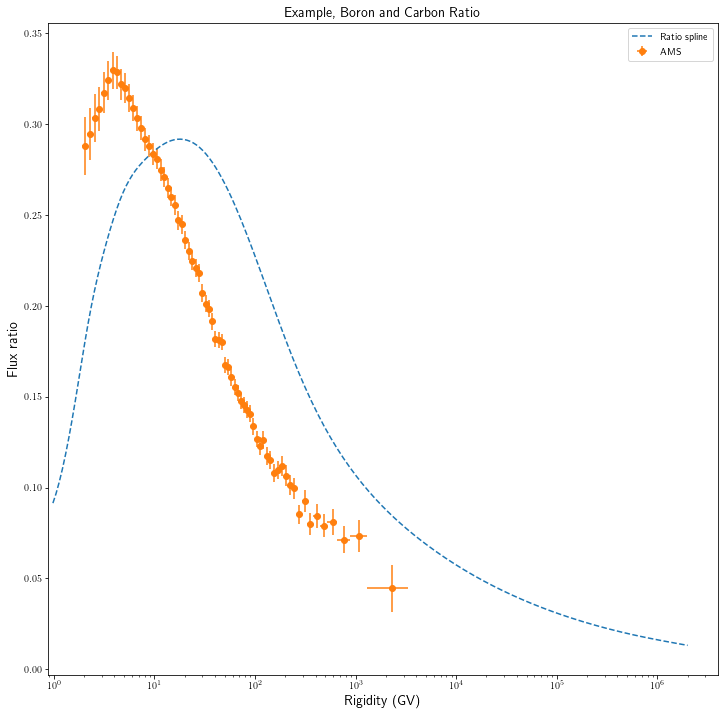

In [30]:
plt.figure(figsize=(12,12))
model=5
fnt=14
x1=0.9*rigC13_spline[0]
x2=2*rigC13_spline[-1]

plt.plot(rigC13_spline, B_C_ratio_spline,'--',label="Ratio spline")
plt.errorbar(rigidity,ratio,xerr=rigidity_binsize,yerr=ratio_errors,fmt='o',label="AMS")

#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity (GV)",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.ylabel("Flux ratio",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='upper right')
plt.title("Example, Boron and Carbon Ratio", fontsize=fnt)
plt.savefig("Boron_carbon_fluxratio_rigidity_splines.png")
plt.show()

In [24]:
#now make functions to get residuals
# to calculate residuals 
#find the elements of the spline energy array closest to the ams energy value:
# for every data point so len(data_y)
def calculate_chi_square(data_x,data_y,model_x,model_y):
    i=0
    closest_x_value=[]
    closest_x_index=[]
    residual=[]
    expected_values=[]
    while i<len(data_y):
        array=model_x
        value=data_x[i]
        absolute_val_array = np.abs(array - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_x_value.append(array[smallest_difference_index])
        closest_x_index.append(smallest_difference_index)
        residual.append(data_y[i]-model_y[smallest_difference_index])
        expected_values.append(model_y[smallest_difference_index])
        i+=1
    #with residuals and these values (indices) calculate the total chi_square
    #make square residuals
    sq_res=np.square(residual)
    sq_res_div=np.true_divide(sq_res,expected_values)
    return residual,np.sum(sq_res_div)

In [34]:
from get_residuals_chi_square import *
residuals,chi_square=calculate_chi_square(rigidity,ratio,rigC13_spline, B_C_ratio_spline)

In [35]:
print(chi_square)

1.6248284221335823
